In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\pedro\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading Dataset

In [2]:
rain = pd.read_csv('./data/rain_data_aus.csv')

In [3]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

In [4]:
rain.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente'],
      dtype='object')

In [5]:
rain.isna().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
dtype: int64

# Treating NaN values

In [6]:
# Droping cols with high values of NaN

In [7]:
rain = rain.drop(['evaporation','sunshine', 'cloud9am', 'cloud3pm'], axis=1)

In [8]:
rain.shape

(142193, 19)

In [9]:
rain = rain.drop(['pressure9am','pressure3pm'], axis=1)

In [10]:
# DROPING ROWS

In [11]:
rain = rain.dropna()

In [12]:
rain.shape

(136489, 17)

In [13]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136489 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              136489 non-null  object 
 1   location          136489 non-null  object 
 2   mintemp           136489 non-null  float64
 3   maxtemp           136489 non-null  float64
 4   rainfall          136489 non-null  float64
 5   humidity9am       136489 non-null  float64
 6   humidity3pm       136489 non-null  float64
 7   temp9am           136489 non-null  float64
 8   temp3pm           136489 non-null  float64
 9   raintoday         136489 non-null  object 
 10  amountOfRain      136489 non-null  float64
 11  raintomorrow      136489 non-null  object 
 12  temp              136489 non-null  float64
 13  humidity          136489 non-null  float64
 14  precipitation3pm  136489 non-null  int64  
 15  precipitation9am  136489 non-null  float64
 16  modelo_vigente    13

## Treating Dtypes

In [14]:
rain.date = pd.to_datetime(rain.date)

In [15]:
rain.raintoday = rain.raintoday.apply(lambda x: 0 if x == 'No' else 1)

In [16]:
rain.raintomorrow = rain.raintomorrow.apply(lambda x: 0 if x == 'No' else 1)

In [17]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136489 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              136489 non-null  datetime64[ns]
 1   location          136489 non-null  object        
 2   mintemp           136489 non-null  float64       
 3   maxtemp           136489 non-null  float64       
 4   rainfall          136489 non-null  float64       
 5   humidity9am       136489 non-null  float64       
 6   humidity3pm       136489 non-null  float64       
 7   temp9am           136489 non-null  float64       
 8   temp3pm           136489 non-null  float64       
 9   raintoday         136489 non-null  int64         
 10  amountOfRain      136489 non-null  float64       
 11  raintomorrow      136489 non-null  int64         
 12  temp              136489 non-null  float64       
 13  humidity          136489 non-null  float64       
 14  prec

# Model Baseline

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

## HOLD OUT: DIVIDE IN TRAIN X TEST

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y = rain.raintomorrow

In [22]:
X = rain[['mintemp', 'maxtemp', 'rainfall', 'humidity9am',
       'humidity3pm', 'temp9am', 'temp3pm', 'amountOfRain',
       'temp', 'humidity', 'precipitation3pm', 'precipitation9am']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.5, 
                                                    random_state = 42)

## TRAINING MODEL

In [24]:
model.fit(X_train, y_train)

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
model.predict(X_train)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
model.predict_proba(X_test)

array([[9.99999984e-01, 1.61731127e-08],
       [9.99999929e-01, 7.12920798e-08],
       [9.99999720e-01, 2.79778209e-07],
       ...,
       [9.99999955e-01, 4.54347330e-08],
       [9.99999985e-01, 1.51669419e-08],
       [9.99999984e-01, 1.55243623e-08]])

In [28]:
model.score(X_test, y_test)

0.9956626859110558

In [29]:
model.score(X_train, y_train)

0.9958384619893323

In [30]:
# Dataset 

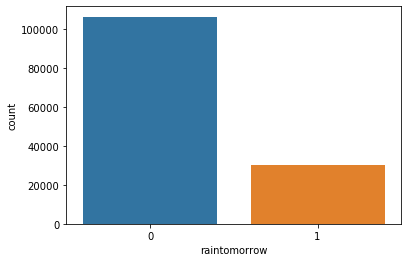

In [31]:
sns.countplot(rain.raintomorrow)

## Matriz de Confusão

In [32]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, plot_roc_curve

In [33]:
confusion_matrix(y_test, model.predict(X_test))

array([[53162,   151],
       [  145, 14787]], dtype=int64)

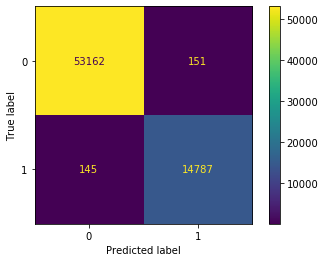

In [34]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')

In [35]:
precision_score(y_test, model.predict(X_test))

0.9898915517472219

In [36]:
recall_score(y_test, model.predict(X_test))

0.9902893115456737

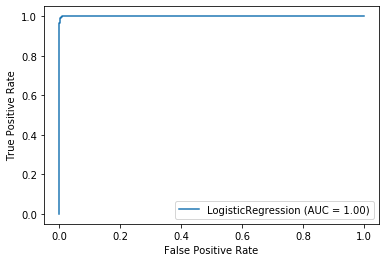

In [37]:
plot_roc_curve(model, X_test, y_test);

In [38]:
X_test.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'humidity9am', 'humidity3pm',
       'temp9am', 'temp3pm', 'amountOfRain', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am'],
      dtype='object')

# Investigating Further

In [39]:
model.coef_

array([[ 3.10589023e-01, -3.66093194e-01, -6.29874561e-03,
        -5.66798267e-02, -5.81250612e-02, -1.17791837e-01,
         4.83064780e-02,  1.43832141e+01, -1.13110106e-02,
         2.15903458e-03, -1.25417933e-01, -6.63129264e-02]])

In [40]:
# importância das variáveis
list(zip(list(X.columns), list(model.coef_[0])))

[('mintemp', 0.31058902257631077),
 ('maxtemp', -0.3660931943843839),
 ('rainfall', -0.0062987456139141),
 ('humidity9am', -0.05667982669842872),
 ('humidity3pm', -0.05812506124318304),
 ('temp9am', -0.11779183726440731),
 ('temp3pm', 0.048306478043993496),
 ('amountOfRain', 14.383214088029744),
 ('temp', -0.011311010567814979),
 ('humidity', 0.0021590345809237984),
 ('precipitation3pm', -0.12541793324414502),
 ('precipitation9am', -0.06631292635357018)]

In [41]:
model.intercept_

array([-1.04058752])

## Standardize Data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
X_std = scaler.fit_transform(X)

In [45]:
X_std

array([[ 0.19409562, -0.04627633, -0.20533959, ..., -1.25797068,
         0.62643224, -0.97692304],
       [-0.7461109 ,  0.26536387, -0.27692147, ..., -2.2417273 ,
        -0.00470734,  2.30015105],
       [ 0.11574508,  0.35035666, -0.27692147, ..., -0.89739232,
         2.2042812 ,  2.15727123],
       ...,
       [-1.34157504,  0.2936948 , -0.27692147, ..., -1.30304298,
        -0.32027713,  1.9438473 ],
       [-1.05951308,  0.52034222, -0.27692147, ..., -1.16782609,
         0.62643224, -1.80306792],
       [-0.68343047,  0.53450769, -0.27692147, ..., -1.16782609,
         1.57314162, -1.12373135]])

In [46]:
X_std = pd.DataFrame(X_std, columns=X.columns)

### Test Model 

In [47]:
y = rain.raintomorrow

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                    test_size = 0.5, 
                                                    random_state = 42)

In [49]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
model.predict(X_train)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
model.predict_proba(X_test)

array([[0.99847749, 0.00152251],
       [0.99783002, 0.00216998],
       [0.99865568, 0.00134432],
       ...,
       [0.99788356, 0.00211644],
       [0.99835447, 0.00164553],
       [0.99841958, 0.00158042]])

In [53]:
model.score(X_test, y_test)

0.9972891786944098

In [54]:
model.score(X_train, y_train)

0.9980804173260653

In [55]:
# Dataset 

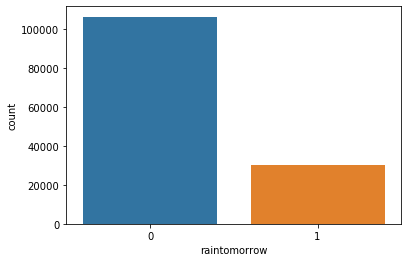

In [56]:
sns.countplot(rain.raintomorrow)

In [57]:
## Matriz de Confusão

In [58]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, plot_roc_curve

In [59]:
confusion_matrix(y_test, model.predict(X_test))

array([[53313,     0],
       [  185, 14747]], dtype=int64)

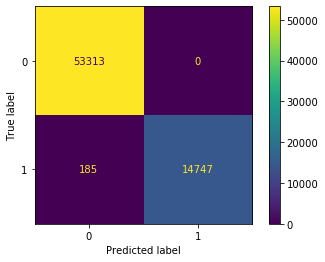

In [60]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')

In [61]:
precision_score(y_test, model.predict(X_test))

1.0

In [62]:
recall_score(y_test, model.predict(X_test))

0.9876105009375837

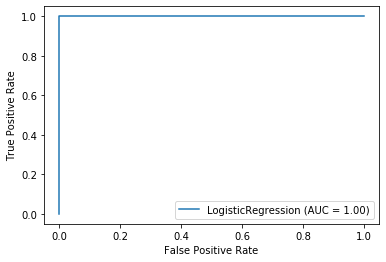

In [63]:
plot_roc_curve(model, X_test, y_test);

## Filtering "right" Features 

In [64]:
X.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'humidity9am', 'humidity3pm',
       'temp9am', 'temp3pm', 'amountOfRain', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am'],
      dtype='object')

In [65]:
rain[8:]

,date,location,mintemp,maxtemp,rainfall,humidity9am,humidity3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
8,2008-12-09,Albury,9.7,31.9,0.0,42.0,9.0,18.3,30.2,0,1.4,1,40.28,12.8,19,1.540702,0.414649
9,2008-12-10,Albury,13.1,30.1,1.4,58.0,27.0,20.1,28.2,1,0.0,0,38.12,34.4,7,8.259833,0.064945
10,2008-12-11,Albury,13.4,30.4,0.0,48.0,22.0,20.4,28.8,0,2.2,1,38.48,28.4,13,4.762301,0.376101
11,2008-12-12,Albury,15.9,21.7,2.2,89.0,91.0,15.9,17.0,1,15.6,1,28.04,111.2,6,12.383105,0.957884
12,2008-12-13,Albury,15.9,18.6,15.6,76.0,93.0,17.4,15.8,1,3.6,1,24.32,113.6,15,5.203499,0.967453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,59.0,27.0,9.4,20.9,0,0.0,0,28.16,34.4,12,5.848681,0.002556
142189,2017-06-21,Uluru,2.8,23.4,0.0,51.0,24.0,10.1,22.4,0,0.0,0,30.08,30.8,10,6.653879,0.002053
142190,2017-06-22,Uluru,3.6,25.3,0.0,56.0,21.0,10.9,24.5,0,0.0,0,32.36,27.2,9,19.715976,0.023350
142191,2017-06-23,Uluru,5.4,26.9,0.0,53.0,24.0,12.5,26.1,0,0.0,0,34.28,30.8,12,0.985551,0.007195


In [66]:

X.head(10)

,mintemp,maxtemp,rainfall,humidity9am,humidity3pm,temp9am,temp3pm,amountOfRain,temp,humidity,precipitation3pm,precipitation9am
0,13.4,22.9,0.6,71.0,22.0,16.9,21.8,0.0,29.48,28.400000,12,5.115360
1,7.4,25.1,0.0,44.0,25.0,17.2,24.3,0.0,32.12,2.208569,10,21.497100
2,12.9,25.7,0.0,38.0,30.0,21.0,23.2,0.0,32.84,38.000000,17,20.782859
3,9.2,28.0,0.0,45.0,16.0,18.1,26.5,1.0,35.60,21.200000,8,12.028646
4,17.5,32.3,1.0,82.0,33.0,17.8,29.7,0.2,40.76,41.600000,9,11.883546
5,14.6,29.7,0.2,55.0,23.0,20.6,28.9,0.0,37.64,29.600000,8,17.320994
6,14.3,25.0,0.0,49.0,19.0,18.1,24.6,0.0,32.00,24.800000,8,19.791271
7,7.7,26.7,0.0,48.0,19.0,16.3,25.5,0.0,34.04,24.800000,7,7.207085
8,9.7,31.9,0.0,42.0,9.0,18.3,30.2,1.4,40.28,12.800000,19,1.540702
9,13.1,30.1,1.4,58.0,27.0,20.1,28.2,0.0,38.12,34.400000,7,8.259833


### Test Model 

In [67]:
y = rain.raintomorrow

In [68]:
X_2 = X_std[['humidity9am', 'humidity3pm', 'temp9am', 'rainfall',
             'temp3pm', 'precipitation3pm', 'precipitation9am']]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [70]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [72]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
model.predict_proba(X_test)

array([[0.93495853, 0.06504147],
       [0.77049493, 0.22950507],
       [0.98047341, 0.01952659],
       ...,
       [0.69695575, 0.30304425],
       [0.50074457, 0.49925543],
       [0.96810529, 0.03189471]])

In [74]:
model.score(X_test, y_test)

0.8344201040369258

In [75]:
model.score(X_train, y_train)

0.8328433662115009

In [76]:
# Dataset 

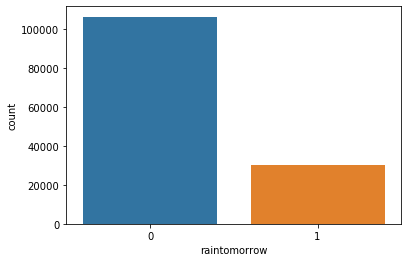

In [77]:
sns.countplot(rain.raintomorrow)

In [78]:
## Matriz de Confusão

In [79]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, plot_roc_curve

In [80]:
confusion_matrix(y_test, model.predict(X_test))

array([[20456,   839],
       [ 3681,  2322]], dtype=int64)

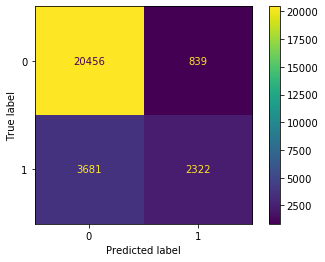

In [81]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')

In [82]:
precision_score(y_test, model.predict(X_test))

0.7345776652957925

In [83]:
recall_score(y_test, model.predict(X_test))

0.3868065967016492

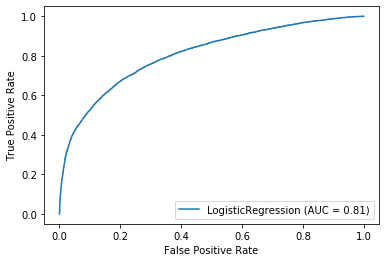

In [84]:
plot_roc_curve(model, X_test, y_test);

In [85]:
list(zip(list(X_2.columns), list(model.coef_[0])))

[('humidity9am', 0.022226016248870103),
 ('humidity3pm', 1.2155828731665654),
 ('temp9am', 0.35699563485172064),
 ('rainfall', 0.32276638961820436),
 ('temp3pm', -0.2665642766640523),
 ('precipitation3pm', 0.017384867001950046),
 ('precipitation9am', -0.01848696242245484)]

In [86]:
precision_score(y_test, model.predict(X_test))

0.7345776652957925

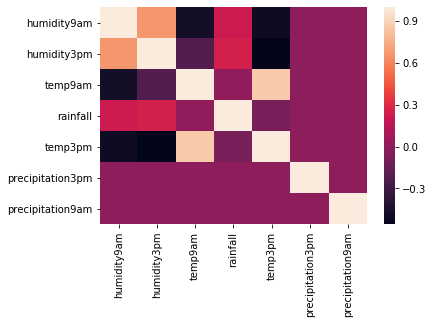

In [87]:
sns.heatmap(X_2.corr())

# NEXT STEPS

In [88]:
rain.head()

,date,location,mintemp,maxtemp,rainfall,humidity9am,humidity3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,71.0,22.0,16.9,21.8,0,0.0,0,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,25.0,17.2,24.3,0,0.0,0,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,38.0,30.0,21.0,23.2,0,0.0,0,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,45.0,16.0,18.1,26.5,0,1.0,0,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,82.0,33.0,17.8,29.7,0,0.2,0,40.76,41.600000,9,11.883546,0.220164


In [89]:
!pwd

/c/Users/pedro/Projetos/processo_cientista


## ADICIONAR LABEL LOCALIZAÇÃO: LATITUDE, LONGITUDE, ALTITUDE POR CIDADE

https://www.latlong.net/category/cities-14-15.html
 PEDRO

## ADICIONAR LABEL DE TEMPO: MÊS DO ANO (COLUNA NOVA)

In [90]:
rain['month'] = rain.date.dt.month
#rain['day'] = rain.date.dt.day
#rain['year'] = rain.date.dt.year

## ADICIONAR VENTO

In [91]:
df1 = pd.read_csv('./data/wind_table_01.csv')

In [92]:
df1.columns

Index(['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am',
       'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm'],
      dtype='object')

In [93]:
df8 = pd.read_csv('./data/wind_table_08.csv')

In [94]:
df8.columns

Index(['date', 'location', 'windgustdir', 'windgustspeed', 'winddir9am',
       'winddir3pm', 'windspeed9am', 'windspeed3pm'],
      dtype='object')

In [95]:
rain = pd.read_csv('./data/rain_data_aus.csv')
wind = pd.DataFrame()
for i in range(1,9):
    df_aux = pd.read_csv(f'./data/wind_table_0{i}.csv')
    df_aux.columns = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am',
       'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']
    wind = pd.concat([wind,df_aux])
rain_wind =  pd.merge(rain, wind, how='left', on=['date', 'location'])

## NOVO DATA CLEANING DE TUDO + WIND

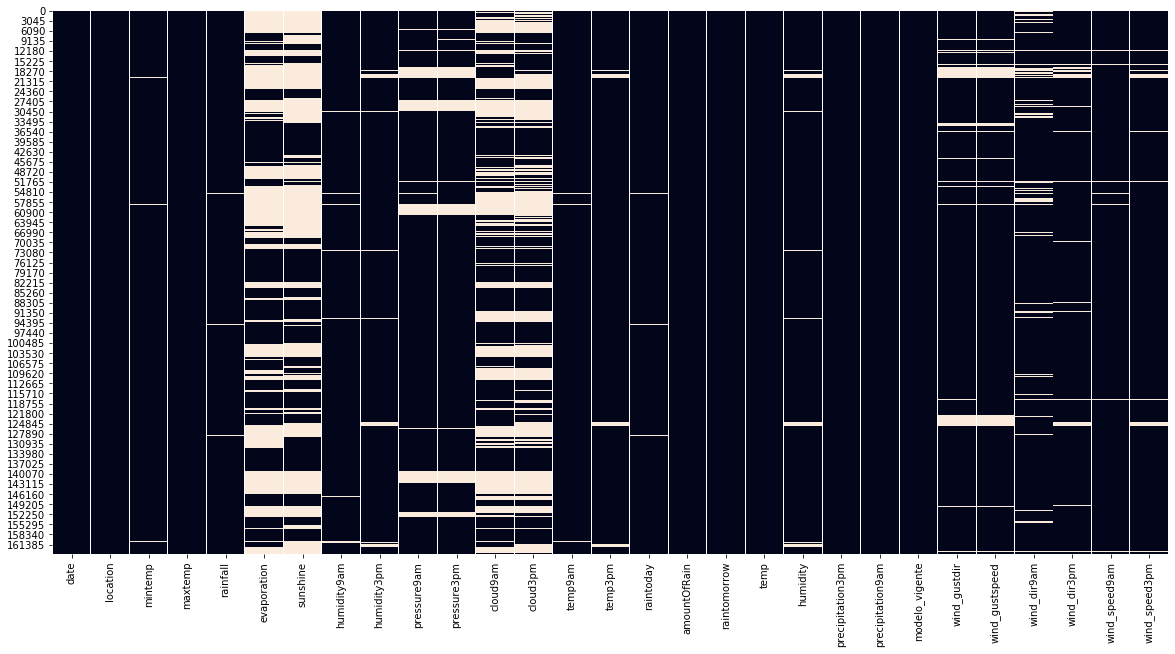

In [96]:
#Heatmap of nulls
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(rain_wind.isnull(), cbar=False);

In [97]:
rain_wind.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,28.400000,12,5.115360,0.089825,W,44.0,W,WNW,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,2.208569,10,21.497100,0.023477,WNW,44.0,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,38.000000,17,20.782859,0.027580,WSW,46.0,W,WSW,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,21.200000,8,12.028646,0.023962,NE,24.0,SE,E,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,41.600000,9,11.883546,0.220164,W,41.0,ENE,NW,7.0,20.0


## GET DUMMIES

In [98]:
dummies_gustdir = pd.get_dummies(rain_wind['wind_dir9am'], drop_first = True)
rain_wind = pd.concat([rain_wind, dummies_gustdir], axis = 1)
rain_wind = rain_wind.drop('wind_dir9am',axis=1)

In [99]:
dummies_gustdir = pd.get_dummies(rain_wind['wind_dir3pm'], drop_first = True)
rain_wind = pd.concat([rain_wind, dummies_gustdir], axis = 1)
rain_wind = rain_wind.drop('wind_dir3pm',axis=1)

In [100]:
pd.set_option('display.max_columns', None)

In [101]:
rain_wind.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_speed9am,wind_speed3pm,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825,W,44.0,20.0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477,WNW,44.0,4.0,22.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580,WSW,46.0,19.0,26.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962,NE,24.0,11.0,9.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164,W,41.0,7.0,20.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## DATE

In [102]:
rain_wind.date = pd.to_datetime(rain_wind.date)
rain_wind['month'] = rain_wind.date.dt.month

## Droping

In [103]:
rain_wind.drop(['evaporation', 'sunshine', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm'], axis = 1, inplace = True)

In [104]:
rain_wind.dropna(axis=0, inplace=True)

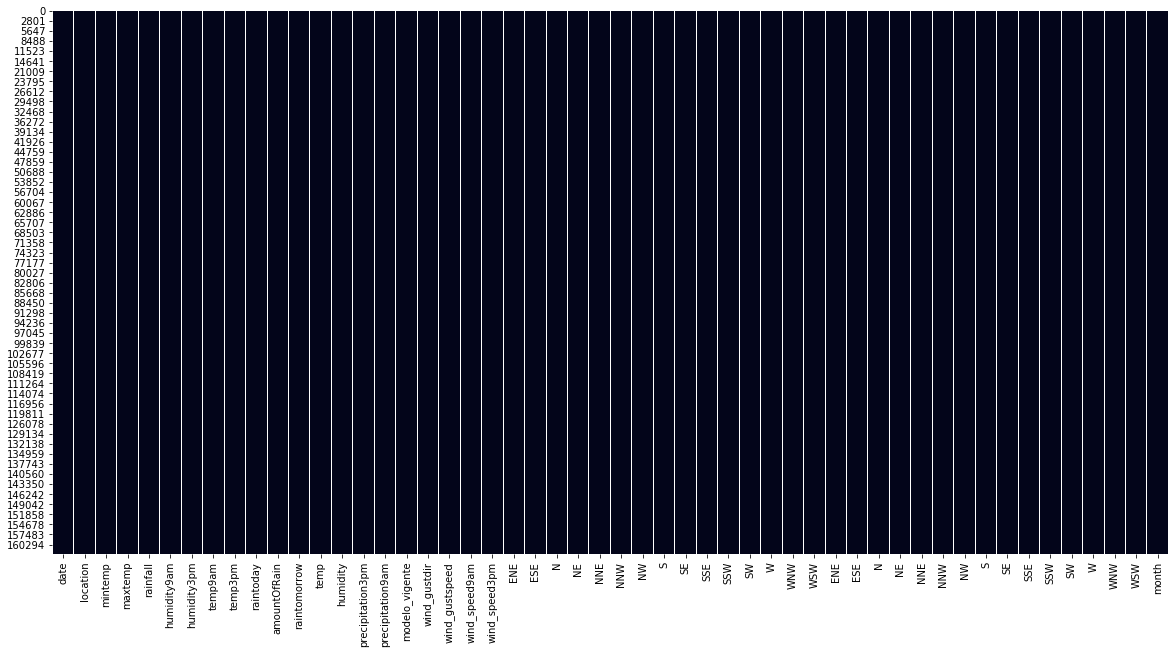

In [105]:
#Heatmap of nulls
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(rain_wind.isnull(), cbar=False);

In [106]:
X = rain_wind.loc[:, 'mintemp':]

In [107]:
X.head()

,mintemp,maxtemp,rainfall,humidity9am,humidity3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_speed9am,wind_speed3pm,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,month
0,13.4,22.9,0.6,71.0,22.0,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825,W,44.0,20.0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,12
1,7.4,25.1,0.0,44.0,25.0,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477,WNW,44.0,4.0,22.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12
2,12.9,25.7,0.0,38.0,30.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580,WSW,46.0,19.0,26.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12
3,9.2,28.0,0.0,45.0,16.0,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962,NE,24.0,11.0,9.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
4,17.5,32.3,1.0,82.0,33.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164,W,41.0,7.0,20.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,12


In [108]:
X.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'humidity9am', 'humidity3pm',
       'temp9am', 'temp3pm', 'raintoday', 'amountOfRain', 'raintomorrow',
       'temp', 'humidity', 'precipitation3pm', 'precipitation9am',
       'modelo_vigente', 'wind_gustdir', 'wind_gustspeed', 'wind_speed9am',
       'wind_speed3pm', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
       'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'ENE', 'ESE', 'N', 'NE', 'NNE',
       'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'month'],
      dtype='object')

In [109]:
X = X[['rainfall', 'humidity9am', 'humidity3pm',
       'temp9am', 'temp3pm', 'precipitation3pm', 'precipitation9am',
        'wind_speed9am','wind_speed3pm', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
       'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'ENE', 'ESE', 'N', 'NE', 'NNE',
       'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'month']]

In [110]:
X['month'].dtype

dtype('int64')

## Standardize

In [111]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### TESTE DE MODELO

In [112]:
rain_wind.raintomorrow = rain_wind.raintomorrow.apply(lambda x: 0 if x == 'No' else 1)

In [113]:
y = rain_wind.raintomorrow

X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

model.fit(X_train, y_train)
model.predict(X_train)
model.predict(X_test)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [114]:
model.predict_proba(X_test)

array([[0.31278137, 0.68721863],
       [0.35996911, 0.64003089],
       [0.32588207, 0.67411793],
       ...,
       [0.9036941 , 0.0963059 ],
       [0.96467805, 0.03532195],
       [0.86496292, 0.13503708]])

In [115]:
model.score(X_test, y_test)

0.8325690376569038

In [116]:
model.score(X_train, y_train)

0.8353264098680302

In [117]:
from sklearn.metrics import precision_score, recall_score

In [118]:
precision_score(y_test, model.predict(X_test))

0.7106870229007634

In [119]:
recall_score(y_test, model.predict(X_test))

0.4194953439471313

## MEXER COLUNAS DE NAN

## MAIS DADOS PARA DAR INPUT?

In [120]:
# DISTÂNCIA DE CADA CIDADE ATÉ O MAR

## TEST SIZE -> MELHOR SCORE

## Imput latitude, longitude cities

In [121]:
from opencage.geocoder import OpenCageGeocode

key = '46b48d2d3d8f4acb88f582e3a83cbe77'
geocoder = OpenCageGeocode(key)

city_lat = {}
city_lng = {}

for city in rain_wind['location'].unique():
    query = f'{city}, Australia'
    results = geocoder.geocode(query)
    city_lat[city] =results[0]['geometry']['lat']
    city_lng[city] =results[0]['geometry']['lng']

In [122]:
cities = pd.DataFrame(data=[city_lat,city_lng]).T
cities = cities.reset_index()
cities.columns= ['location','lat','lng']
rain_wind = pd.merge(left=rain,right=cities,on='location')

In [123]:
rain_wind

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,lat,lng
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825,-36.080477,146.916280
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477,-36.080477,146.916280
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580,-36.080477,146.916280
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962,-36.080477,146.916280
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164,-36.080477,146.916280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136217,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,28.16,34.400000,12,5.848681,0.002556,-25.345554,131.036961
136218,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,30.08,30.800000,10,6.653879,0.002053,-25.345554,131.036961
136219,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,32.36,27.200000,9,19.715976,0.023350,-25.345554,131.036961
136220,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,34.28,30.800000,12,0.985551,0.007195,-25.345554,131.036961
